### 문제 2. 고객이 action 장르와 romance 장르에 각각 점수를 매겼을 때 3개의 영화 중 1개를 추천하는 시스템을 설계하고자 한다. 문제 2-1, 2-2, 2-3을 수행하여라 (총 70점)

#### Import packages (수정X)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

#### Download dataset (수정X)

In [6]:
!wget -q "https://dongaackr-my.sharepoint.com/:x:/g/personal/byungjupark_donga_ac_kr/ETWstKFxQZJLmEW2J900ZGgBmTXeRjuBhjC9AH8RowebZQ?e=4t2XIk&download=1" -O movie_data.csv
data = pd.read_csv('movie_data.csv')


X = np.array(data[['action', 'romance']])
y = np.array(data['movie'])

print(data)

      index     action    romance  movie
0         0  49.146079  79.979538      1
1         1  85.284840  53.017365      0
2         2  33.516447  23.331061      2
3         3  66.195800  47.949021      0
4         4  95.083307  32.949633      0
...     ...        ...        ...    ...
1995   1995  11.516978  65.790940      1
1996   1996  87.495345  93.463081      0
1997   1997  59.050144  41.452267      2
1998   1998  98.967292  68.042245      0
1999   1999  25.887257  40.635628      2

[2000 rows x 4 columns]


'wget'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


#### Dataset 시각화 (수정X)

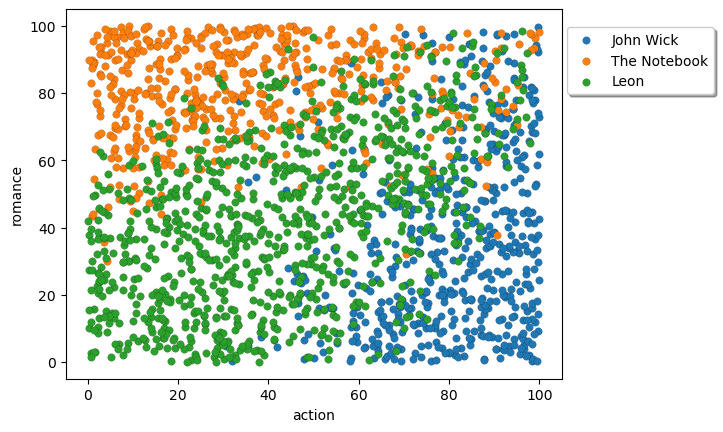

In [7]:
label = ['John Wick', 'The Notebook', 'Leon']
color = ['C0', 'C1', 'C2']
for i in range(3):
    temp_x = []
    for j in range(len(y)):
        if y[j] == i:
            temp_x.append(X[j])
    temp_x = np.array(temp_x)
    plt.scatter(temp_x[:, 0], temp_x[:, 1], marker='o', c=color[i], s=30, edgecolor="k", linewidth=0.1, label=label[i])
plt.xlabel("action")
plt.ylabel("romance")
plt.legend(loc=(1.01, 0.77), frameon=True, shadow=True)
plt.show()

#### 데이터셋 가우시안 정규화 및 train/test 분리 수행 (수정X)

In [8]:
'''각각의 데이터에 대해 Gaussian 정규화'''
X0_mean = np.mean(X[:, 0])   # Action 데이터에 대한 평균
X0_std = np.std(X[:, 0])     # Action 데이터에 대한 표준편차

X1_mean = np.mean(X[:, 1])   # Romance 데이터에 대한 평균
X1_std = np.std(X[:, 1])     # Romance 데이터에 대한 표준편차

X[:, 0] = (X[:, 0] - X0_mean) / X0_std # Action 데이터 가우시안 정규화
X[:, 1] = (X[:, 1] - X1_mean) / X1_std # Romance 데이터 가우시안 정규화


'''Train/Test 데이터 분리'''
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234) # Train 80%, Test 20% 로 랜덤 분리

# x_train: 정규화가 완료된 학습용 입력 데이터
# x_test: 정규화가 완료된 테스트용 입력 데이터
# y_train: 학습용 정답 데이터
# y_test: 테스트용 정답 데이터



---



## 문제 2-1.정규화된 학습용 데이터셋을 이용해 3개 SVM 모델을 학습하고, 각 SVM 모델 파라미터 (W, b)를 출력하여라. (25점)

#### 문제 2-1. SVM 구현 (코드 작성 - fit() 함수)

In [28]:
#### 문제 2-1. SVM 구현 (코드 작성 - fit() 함수)
class SVM:    
    def __init__(self, learning_rate, iteration):
        # Initialization
        self.lr = learning_rate
        self.n_iters = iteration
        self.w = None
        self.b = None


    def fit(self, X, y):
        # Hinge loss를 이용해 self.w, self.b 변수 업데이트
        n_samples, n_features = X.shape
        
        # 가중치와 편향 초기화
        self.w = np.zeros(n_features)
        self.b = 0
        
        # 레이블을 -1과 1로 변환 (SVM 요구사항)
        y_ = np.where(y <= 0, -1, 1)
        
        # 경사 하강법을 사용한 최적화
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                # Hinge Loss의 조건 확인
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                
                if not condition:
                    # 마진 안쪽에 있는 경우 (잘못 분류되거나 마진 내부에 있음)
                    self.w += self.lr *  (y_[idx] * x_i)
                    self.b += self.lr * y_[idx]


    def predict(self, X):
        # Prediction
        predictor = np.dot(X, self.w) + self.b
        predictor_class = np.sign(predictor)
        return predictor_class

#### 문제 2-1. SVM training 수행 (코드 작성)

In [ ]:
'''
각각의 class를 분류하기 위한 model training 수행

[Class]
    0: 존윅 (JohnWick)
    1: 노트북 (TheNotebook)
    2: 레옹 (Leon)
'''
# Hyper parameter 설정
learning_rate = 0.001
iteration = 1000

# 데이터 전처리
y_JohnWick = np.where(y == 0, 1, -1)  # 존윅(0)은 1, 나머지는 -1
y_TheNotebook = np.where(y == 1, 1, -1)  # 노트북(1)은 1, 나머지는 -1
y_Leon = np.where(y == 2, 1, -1)  # 레옹(2)은 1, 나머지는 -1

# 존윅(0) 클래스를 위한 모델 학습
model_svm_JohnWick = SVM(learning_rate, iteration)
model_svm_JohnWick.fit(X, y_JohnWick)

# 노트북(1) 클래스를 위한 모델 학습
model_svm_TheNotebook = SVM(learning_rate, iteration)
model_svm_TheNotebook.fit(X, y_TheNotebook)

# 레옹(2) 클래스를 위한 모델 학습
model_svm_Leon = SVM(learning_rate, iteration)
model_svm_Leon.fit(X, y_Leon)


#### 문제 2-1. SVM 모델 파라미터 출력 (수정X)

In [30]:
print(f'[JohnWick] W: {model_svm_JohnWick.w}, b: {model_svm_JohnWick.b}')
print(f'[TheNotebook] W: {model_svm_TheNotebook.w}, b: {model_svm_TheNotebook.b}')
print(f'[Leon] W: {model_svm_Leon.w}, b: {model_svm_Leon.b}')

[JohnWick] W: [ 2.23882488 -1.18384427], b: -1.8699999999999048
[TheNotebook] W: [-1.20415458  2.47398585], b: -2.1219999999998773
[Leon] W: [-0.70786041 -0.68542363], b: -0.3710000000000003


#### SVM 시각화 (참고용) (수정X)

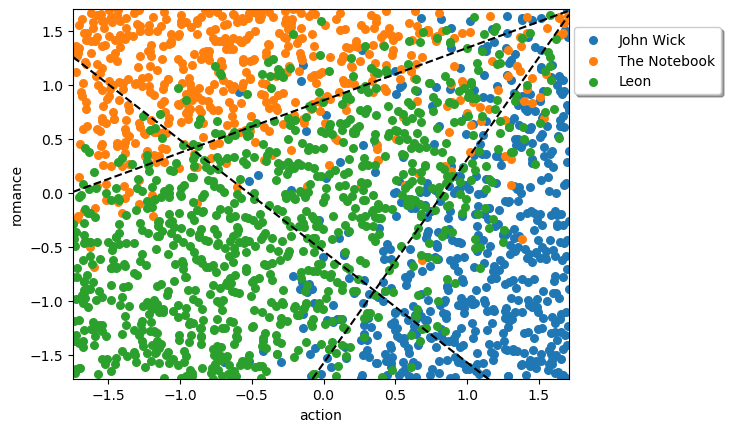

In [31]:
def get_hyperplane_value(x, w, b, offset):
    return (-w[0] * x - b + offset) / w[1]

def visualize_svm(w, b, w2, b2, w3, b3):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    #plt.scatter(X[:, 0], X[:, 1], marker="o", s=10, c=y)
    label = ['John Wick', 'The Notebook', 'Leon']
    color = ['C0', 'C1', 'C2']
    for i in range(3):
        temp_x = []
        for j in range(len(y)):
            if y[j] == i:
                temp_x.append(X[j])
        temp_x = np.array(temp_x)
        plt.scatter(temp_x[:, 0], temp_x[:, 1], marker='o', c=color[i], s=30, label=label[i])

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, w, b, 0)
    x1_2 = get_hyperplane_value(x0_2, w, b, 0)

    x2_1 = get_hyperplane_value(x0_1, w2, b2, 0)
    x2_2 = get_hyperplane_value(x0_2, w2, b2, 0)

    x3_1 = get_hyperplane_value(x0_1, w3, b3, 0)
    x3_2 = get_hyperplane_value(x0_2, w3, b3, 0)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "k--")
    ax.plot([x0_1, x0_2], [x2_1, x2_2], "k--")
    ax.plot([x0_1, x0_2], [x3_1, x3_2], "k--")

    plt.xlim([np.min(X[:, 0]), np.max(X[:, 0])])
    plt.ylim([np.min(X[:, 1]), np.max(X[:, 1])])
    plt.xlabel("action")
    plt.ylabel("romance")
    plt.legend(loc=(1.01, 0.77), frameon=True, shadow=True)
    plt.show()

visualize_svm(model_svm_JohnWick.w, model_svm_JohnWick.b, model_svm_TheNotebook.w, model_svm_TheNotebook.b, model_svm_Leon.w, model_svm_Leon.b)

---



# 문제 2-2. 정규화된 학습용 데이터셋을 이용해 학습된 KNN 모델에서 1에서 30 사이의 홀수 값 중 최적의 K 값을 선정하여라. (25점)

#### 문제 2-2. KNN 구현 (코드 작성 - predict() 함수)

In [ ]:
def L2_distance(x1, x2):
  return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
  def __init__(self):
    # initialization

  def fit(self, X, y):
    # Storage training datas
    self.train_x = X
    self.train_y = y

  def predict(self, X):
    # Prediction

    return y_pred

#### 문제 2-2. 정규화된 학습용 데이터셋을 이용해 KNN 모델 학습 (수정X)

In [ ]:
'''
학습용 데이터셋을 이용해 KNN 모델 학습
'''
model_knn = KNN()
model_knn.fit(x_train, y_train)

#### 문제 2-2. 최적의 k값 도출 (코드 작성)

In [ ]:
'''
테스트용 데이터셋을 이용해 모든 후보 K에 대해 정확도 측정 및 가장 높은 정확도를 가지는 K 값 선정
K 후보: 1 ~ 30 사이 모든 홀수 값

정확도 측정 방법 (아래)
accuracy = np.sum(y_pred == y_test) / len(y_test)
'''


#### 문제 2-2. 최적의 k값 저장 (코드 작성)

In [ ]:
'''
상기 코드를 통해 도출한 최적의 K를 bset_k 변수에 저장
'''
best_k =



---



# 문제 2-3. Action 26.5점, Romance 66.5점을 부여했을 때, 문제 2-1, 2-2에서 학습한 SVM, KNN 모델을 이용하여 각각 추천 영화를 예측하여라. (20점)

#### 문제 2-3. 신규 입력 데이터 정규화 및 저장 (수정X)

In [32]:
# 신규 입력 데이터
new_action_score = 26.5
new_romance_score = 66.5

# 학습용/테스트용 데이터에서 도출한 평균 및 표준편차를 이용해 신규 데이터 정규화
new_action_score = (new_action_score - X0_mean) / X0_std
new_romance_score = (new_romance_score - X1_mean) / X1_std

# 신규 입력 데이터 저장
new_data = np.array([[new_action_score, new_romance_score]])

#### 문제 2-3. SVM 예측 수행 (코드 작성)

In [33]:
'''
[Class]
    0:  JohnWick (존 윅)
    1:  TheNotebook (노트북)
    2:  Leon (레옹)
'''

# 문제 2-1에서 학습한 3개 SVM 모델을 이용해 new_data 예측
# 각 모델의 예측 점수 계산
score_johnwick = np.dot(new_data, model_svm_JohnWick.w) + model_svm_JohnWick.b
score_notebook = np.dot(new_data, model_svm_TheNotebook.w) + model_svm_TheNotebook.b
score_leon = np.dot(new_data, model_svm_Leon.w) + model_svm_Leon.b

# 결과 출력
print(f"\n각 영화 유형별 점수:")
print(f"JohnWick: {score_johnwick[0]:.4f}")
print(f"TheNotebook: {score_notebook[0]:.4f}")
print(f"Leon: {score_leon[0]:.4f}")

# 가장 높은 점수를 가진 영화 선택
scores = [score_johnwick[0], score_notebook[0], score_leon[0]]
movie_types = ["JohnWick", "TheNotebook", "Leon"]
predicted_index = np.argmax(scores)

print(f"\nSVM 모델 예측 결과: {movie_types[predicted_index]} 스타일의 영화입니다.")


각 영화 유형별 점수:
JohnWick: -4.3933
TheNotebook: 0.2566
Leon: -0.1623

SVM 모델 예측 결과: TheNotebook 스타일의 영화입니다.


#### 문제 2-3. SVM 예측 영화 선정 (답변 작성)

In [ ]:
'''
SVM을 이용해 선정된 영화를 입력하세요 (한글, 영어 상관없음, 복수 답변 허용)
정답: [노트북]
'''

#### 문제 2-3 KNN 예측 수행 (코드 작성)

In [ ]:
'''
[Class]
    0:  JohnWick (존 윅)
    1:  TheNotebook (노트북)
    2:  Leon (레옹)
'''

# 문제 2-2에서 학습한 KNN 모델과 best_k를 이용해 new_data 예측


#### 문제 2-3 KNN 예측 영화 선정 (답변 작성)

In [ ]:
'''
KNN을 이용해 선정된 영화를 입력하세요 (한글, 영어 상관없음, 복수 답변 허용)
정답: [    ]
'''